In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.shape

(545, 13)

In [6]:
df = df[['area','bedrooms','bathrooms','price']]

In [7]:
df.head()

,area,bedrooms,bathrooms,price
0,7420,4,2,13300000
1,8960,4,4,12250000
2,9960,3,2,12250000
3,7500,4,2,12215000
4,7420,4,1,11410000


In [8]:
df.isnull().sum()

area         0
bedrooms     0
bathrooms    0
price        0
dtype: int64

In [36]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

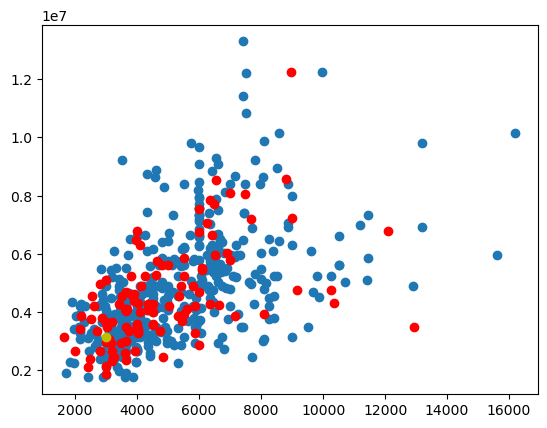

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X_train['area'],Y_train)
plt.scatter(X_test['area'],Y_test,c='r')
plt.scatter(3000,3152951,c='y')

## Linear regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
LR = LinearRegression()
LR.fit(X_train,Y_train)
y_pred = LR.predict(X_test)
r2_score(Y_test,y_pred)
# LR.predict([[3000,2,1]])

0.4169873654862356

## Batch gradient descent

In [396]:
class linearregression:
    def __init__(self,epochs=100,lr=0.01):
        self.epochs=epochs
        self.lr=lr
        self.intercept_ = None
        self.coef_ = None
    
    def fit(self,X_train,Y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            y_pred = np.dot(X_train,self.coef_)+self.intercept_
            
            slope_intercept = -2*np.mean(Y_train-y_pred)
            self.intercept_ = self.intercept_-(self.lr*slope_intercept)
            
            slope_coef = -2*np.dot((Y_train-y_pred),X_train)/X_train.shape[0]
            self.coef_ = self.coef_-(self.lr*slope_coef)
        print(self.intercept_, self.coef_)

In [397]:
lr = linearregression()
lr.fit(X_train,Y_train)

nan [nan nan nan]


C:\Users\deepanshu bansal\AppData\Local\Temp\ipykernel_732\1287924541.py:19: RuntimeWarning: invalid value encountered in subtract
  self.coef_ = self.coef_-(self.lr*slope_coef)


## Polynomial features

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
LR = LinearRegression()
PF = PolynomialFeatures(degree=3)
X = PF.fit_transform(X_train)
X1 = PF.transform(X_test)
LR.fit(X,Y_train)
y_pred = LR.predict(X1)
r2_score(Y_test,y_pred)
# LR.predict([[3000,2,1]])

0.487377456340472

## Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
LOR = LogisticRegression()
LOR.fit(X_train,Y_train)
y_pred = LOR.predict(X_test)
r2_score(Y_test,y_pred)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-0.037125490464555266

## SGD regressor

In [27]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
SGDR = SGDRegressor(max_iter=50,learning_rate='constant',eta0=0.1)
SGDR.fit(X,Y)
y_pred = SGDR.predict(X)
r2_score(Y,y_pred)

-4.8188442383883135e+53

## Decision tree regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train,Y_train)
y_pred = DT.predict(X_test)
r2_score(Y_test,y_pred)
DT.predict([[3600,2,1]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([3727500.])

## SVM

In [29]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X,Y)
y_pred = SVM.predict(X)
r2_score(y_pred,Y)

-4.022311130010239

## Voting regressor

In [30]:
ensemble=[('LR',LR),('DT',DT)]
from sklearn.ensemble import VotingRegressor
VR = VotingRegressor(estimators=ensemble)
VR.fit(X_train,Y_train)
y_pred = VR.predict(X_test)
r2_score(Y_test,y_pred)

0.6009618889200625

## Bagging

In [31]:
from sklearn.ensemble import BaggingRegressor
BR = BaggingRegressor(n_estimators=92)
BR.fit(X_train,Y_train)
y_pred = BR.predict(X_test)
r2_score(Y_test,y_pred)

0.5882113081168716

## Random forest regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100)
RFR.fit(X,Y)
y_pred = RFR.predict(X)
r2_score(y_pred,Y)

0.8073427874604729

## Gradient boosting

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(learning_rate=0.1,n_estimators=2)
GBR.fit(X_train,Y_train)
y_pred = GBR.predict(X_test)
r2_score(Y_test,y_pred)

0.18757836658186433

In [221]:
print("Linear regression: ",LR.predict([[7420,4,2]]))
print("Logistic regression: ",LOR.predict([[7420,4,2]]))
print("SGD regressor: ",SGDR.predict([[7420,4,2]]))
print("Decision tree regressor: ",DT.predict([[7420,4,2]]))
print("SVM: ",SVM.predict([[7420,4,2]]))
print("Voting regressor: ",VR.predict([[7420,4,2]]))
print("Bagging: ",BR.predict([[7420,4,2]]))
print("Random forest regressor: ",RFR.predict([[7420,4,2]]))
print("Gradient boosting: ",GBR.predict([[7420,4,2]]))

Linear regression:  [7036627.15462756]
SGD regressor:  [2.78754543e+18]
Decision tree regressor:  [13300000.]
SVM:  [3500000]
Voting regressor:  [10168313.57731378]
Bagging:  [11300434.7826087]
Random forest regressor:  [11310075.]
Gradient boosting:  [5214970.01848354]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid fea

In [400]:
import pickle
pickle.dump(df,open('df.pkl','wb'))